[312.99076412] [0.26633685]
[0.58127405]
[array([1511.50658737])]


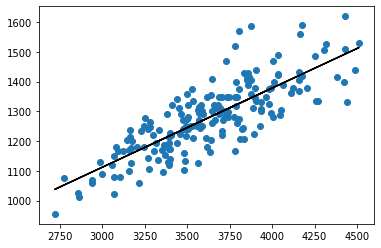

In [1]:
from math import sqrt
import matplotlib.pyplot as plt
from random import randrange

class Linear_Regression():
    
    def __init__(self):

        self.X_train = []
        self.y_train = []
        self.X_test = []
        self.y_test = []
        self.b0 = 0.0
        self.b1 = 0.0
        
    # Evaluate an algorithm using a train/test split
    def train_test_split(self,X, y, split):
        X_train = list()
        y_train = list()
        train_size = split * len(X)
        X_test = list(X)
        y_test = list(y)
        while len(X_train) < train_size:
            index = randrange(len(X_test))
            X_train.append(X_test.pop(index))
            y_train.append(y_test.pop(index))
        return X_train,X_test,y_train,y_test
    
    
    # Calculate r2 error
    def score(self,X,y):
        self.X_test = X
        self.y_test = y
        sum_error = 0.0
        sum_square_error = 0.0
        mean_value = np.mean(self.y_test)
        predicted = self.predict(self.X_test)
        for i in range(len(self.y_test)):
            prediction_error = predicted[i] - self.y_test[i]
            sum_error = sum_error + ((self.y_test[i] - mean_value)**2)
            sum_square_error = sum_square_error + (prediction_error ** 2)
        r2 = 1 - (sum_square_error/sum_error)
        return r2
        
    # Simple linear regression algorithm
    def fit(self,X,y):
        
        self.X_train = X
        self.y_train = y
        
        b0, b1 = self.coefficients()
        print(b0,b1)
        self.b0 = b0
        self.b1 = b1
        self.linear_plot()
        
    # Calculate the mean value of a list of numbers
    def mean(self,values):
        return sum(values) / float(len(values))
 
    # Calculate covariance between x and y
    def covariance(self,mean_x, mean_y):
        covar = 0.0
        for i in range(len(self.X_train)):
            covar = covar + ((self.X_train[i] - mean_x) * (self.y_train[i] - mean_y))
        return covar
 
    # Calculate the variance of a list of numbers
    def variance(self, mean):
        return sum([(x-mean)**2 for x in self.X_train])
 
    # Calculate coefficients
    def coefficients(self):

        x_mean, y_mean = self.mean(self.X_train), self.mean(self.y_train)
        b1 = self.covariance(x_mean, y_mean) / self.variance(x_mean)
        b0 = y_mean - b1 * x_mean
        return [b0, b1]
 
    # Prediction of some values
    def predict(self,X):
        predictions = list()
        for row in X:
            predict_y = self.b0 + self.b1 * row
            predictions.append(predict_y)
        return predictions
    
    # Plotting graph
    def linear_plot(self):
        plt.scatter(self.X_train,self.y_train)
        plt.plot(self.X_train,self.predict(self.X_train),c="black")

if __name__ == "__main__":
    
    import numpy as np
    import pandas as pd
    data = pd.read_csv("headbrain.csv")
    data = data.drop(["Gender","Age Range"],axis = 1)
    x,y = np.array(data["Head Size(cm^3)"]),np.array(data["Brain Weight(grams)"])
    x = x.reshape(-1,1)
    
    model = Linear_Regression()
    X_train,X_test,y_train,y_test  = model.train_test_split(x, y, .8)
    model.fit(X_train,y_train)
    print(model.score(X_test,y_test)) 
    print(model.predict([4500]))